<a href="https://colab.research.google.com/github/anishareddy04/ML_CSE_21206A/blob/ML_LAB_CODES/ML_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from collections import Counter
import math

In [ ]:
#uplading the dataset
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
upload= files.upload()

Mounted at /content/drive


Saving Question_1_Data.xlsx to Question_1_Data.xlsx


In [ ]:
#accessing the excel sheet
excel = pd.ExcelFile('Question_1_Data.xlsx')
data = pd.read_excel(excel, 'Question_1_Data')


In [ ]:
#printing the data
data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


A1.For the data table provided below, calculate the entropy associated with each attribute / feature
at the root node. Using this information, identify the first feature that you’d select for constructing
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label.

In [ ]:
#converting the data into regression data
data=[[1,3,0,0,0],[1,3,0,1,0],[2,3,0,0,1],[3,2,0,0,1],[3,1,1,0,1],[3,1,1,1,0],[2,1,1,1,1],[1,2,0,0,0],[1,1,1,0,1],[3,2,1,0,1],[1,2,1,1,1],[2,2,0,1,1],[2,3,1,0,1],[3,2,0,1,0]]
data = pd.DataFrame(data,columns=['age','income','student','credit_rating','buys_computer'])
data


counts=np.bincount(data["credit_rating"])# number of each unique value in a column (6 excellent and 8 fair )
counts


len(data["credit_rating"]) # total 14 instances

#to calculate entropy
def calc_entropy(column):
  counts=np.bincount(column)
  probability = counts/(len(column))
  entropy =0
  for prob in probability:
    if prob >0:
      entropy += prob * math.log(prob,2) # calculate entropy of each value and add them to find the total emtropy
  return -entropy # as per formula of entropy

# Calculating entropy of each column by using the function
print(calc_entropy(data["buys_computer"]))
print(calc_entropy(data["age"]))
print(calc_entropy(data["income"]))
print(calc_entropy(data["student"]))
print(calc_entropy(data["credit_rating"]))

# to calculate gain
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    return  original_entropy - subract

# Information gain of  each column
print()
print(information_gain(data,"age","buys_computer"))
print(information_gain(data,"income","buys_computer"))
print(information_gain(data,"student","buys_computer"))
print(information_gain(data,"credit_rating","buys_computer"))

0.9402859586706309
1.5774062828523452
1.5566567074628228
1.0
0.9852281360342516

0.593517889222535
0.26101631550442117
0.15183550136234136
0.04812703040826927


A2.Create a Decision Tree for the above data. Get the depth of the constructed tree.
model = DecisionTreeClassifier()
model = ml_model.fit(Tr_X,Tr_y)
model.score(Tr_X, Tr_y)#Training Set accuracy
print(model.get_depth())#print the tree depth

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
x=data.iloc[:, 0:4].values
x

array([[1, 3, 0, 0],
       [1, 3, 0, 1],
       [2, 3, 0, 0],
       [3, 2, 0, 0],
       [3, 1, 1, 0],
       [3, 1, 1, 1],
       [2, 1, 1, 1],
       [1, 2, 0, 0],
       [1, 1, 1, 0],
       [3, 2, 1, 0],
       [1, 2, 1, 1],
       [2, 2, 0, 1],
       [2, 3, 1, 0],
       [3, 2, 0, 1]])

In [ ]:
y = data.iloc[:, 4:5].values
y

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
dt.fit(x,y)
DecisionTreeClassifier()
dt.score(x,y)


1.0

In [ ]:
print(dt.get_depth())


4


A3. Visualize the constructed tree with plot_tree() command. Following code snippet for help.
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()**bold text**

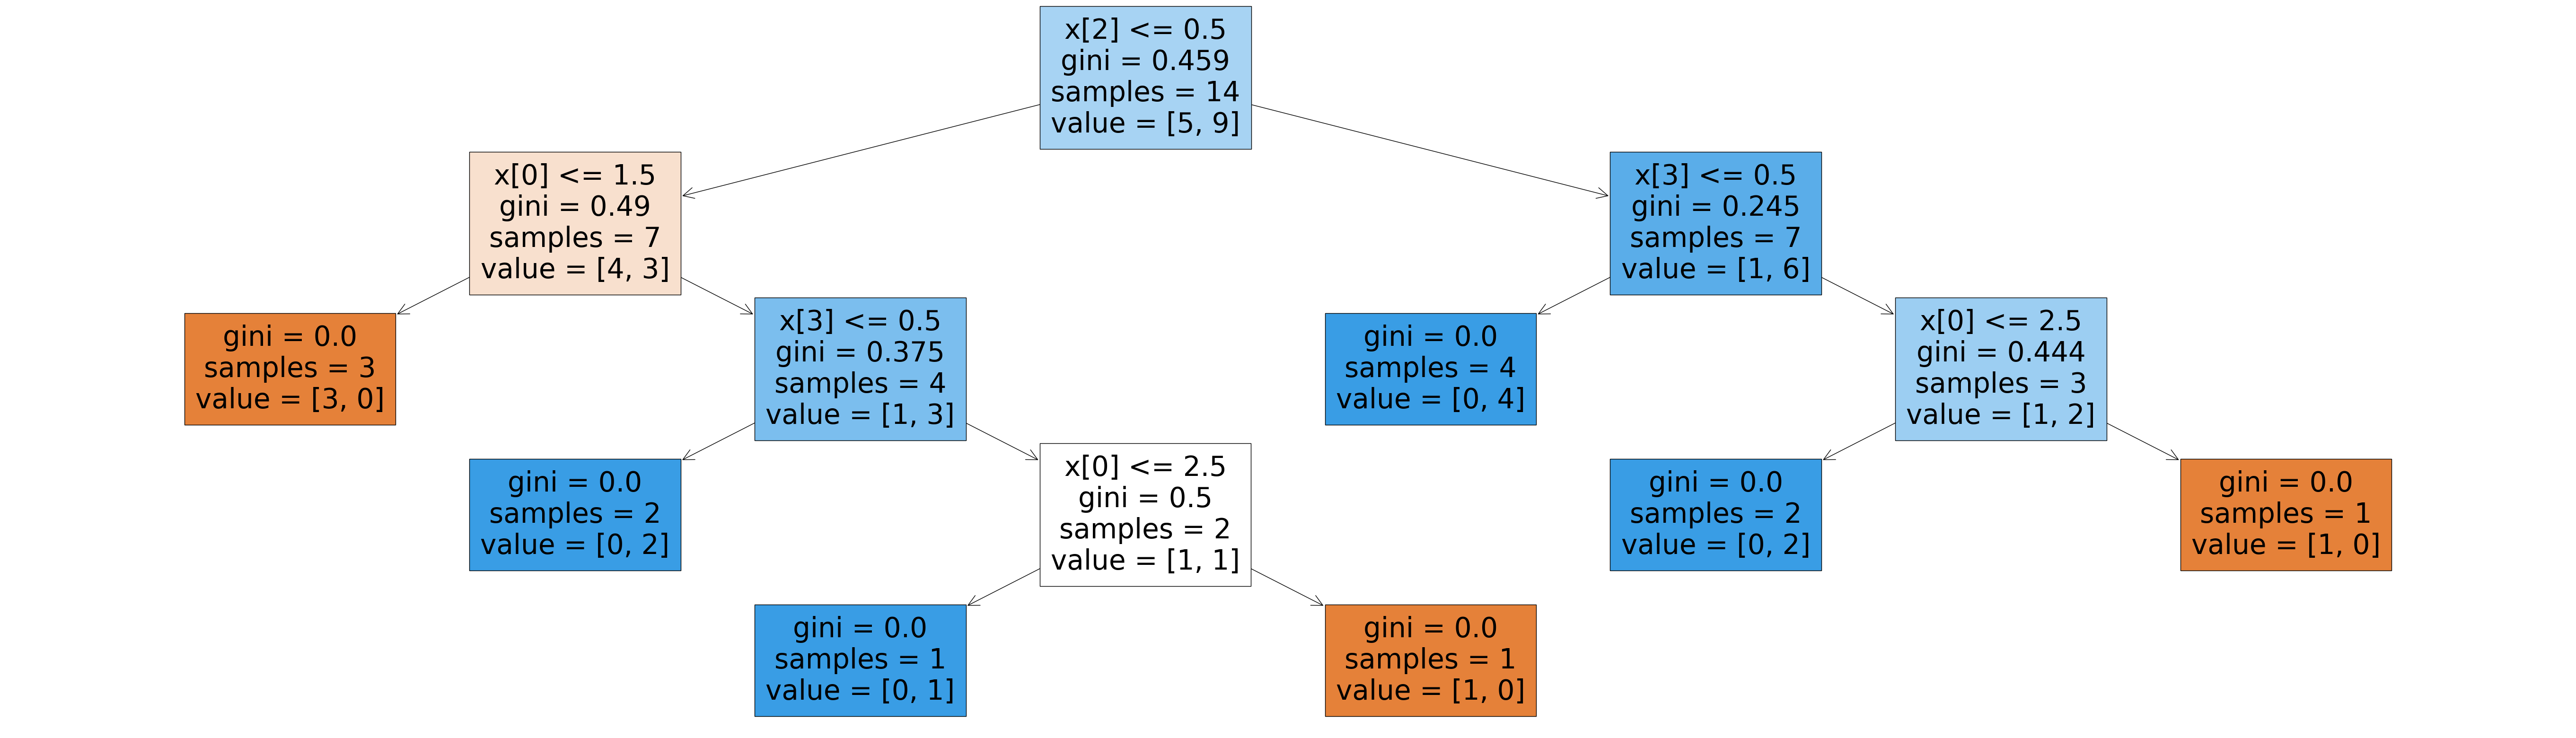

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(dt, filled=True)
plt.show()